In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-prediction-dataset/Breast_cancer_data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df1= pd.read_csv('../input/breast-cancer-prediction-dataset/Breast_cancer_data.csv')

In [4]:
df1.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [5]:
#Let us check the dataset info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [6]:
#How are the data distributed?
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean_radius,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.7800,28.1100
mean_texture,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.8000,39.2800
mean_perimeter,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.1000,188.5000
mean_area,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.7000,2501.0000
mean_smoothness,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634
diagnosis,569.0,0.627417,0.483918,0.00000,0.00000,1.00000,1.0000,1.0000


Observation 1: Data looks to be al Numeric All data are available and not any is missing For a quick check, checking the mean and max values, to see if max is twice the mean - means the distribution is normal (its always better to have distplot for finer details) Apart from mean_area, rest features are closely normal distributed. mean_area looks right skewed

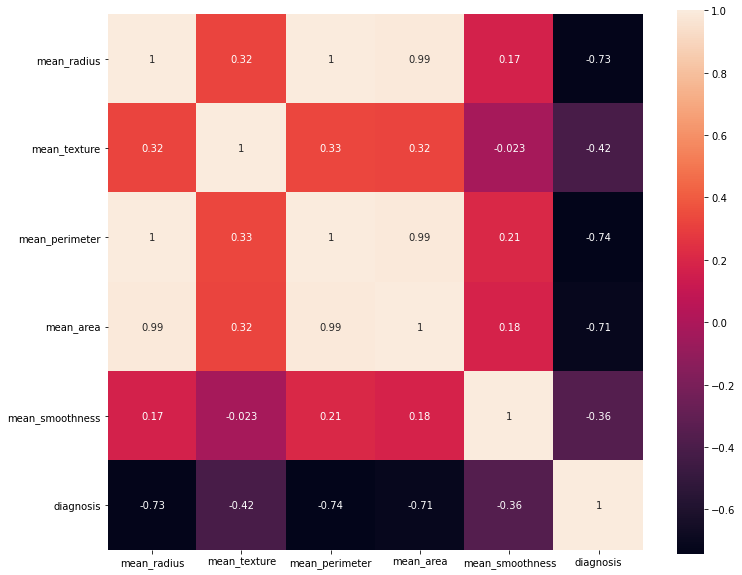

In [7]:
#Check for data correlation
plt.figure(figsize=(12,10))
sns.heatmap(df1.corr(), annot=True, square=True)

Observation 2: mean_perimter is strongly correlated with mean_radius (100%) Also mean_perimeter is strongly correlated with mean_area(99%) So we can retain mean_radius and drop mean_perimter and mean_area as both are calcuative of the mean_radius

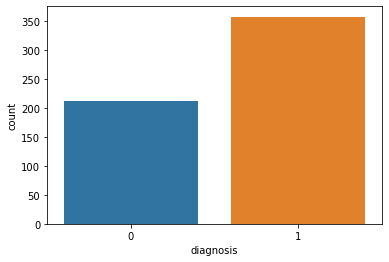

In [8]:
#Let us check the balancing of the output data
sns.countplot(df1['diagnosis'])

In [9]:
#Data split between 2 output classifier
df1['diagnosis'].value_counts()/len(df1['diagnosis'])*100

1    62.741652
0    37.258348
Name: diagnosis, dtype: float64

The data is not poorly imbalanced though fairly they are 63:37 We shall deal with this later using other approaches

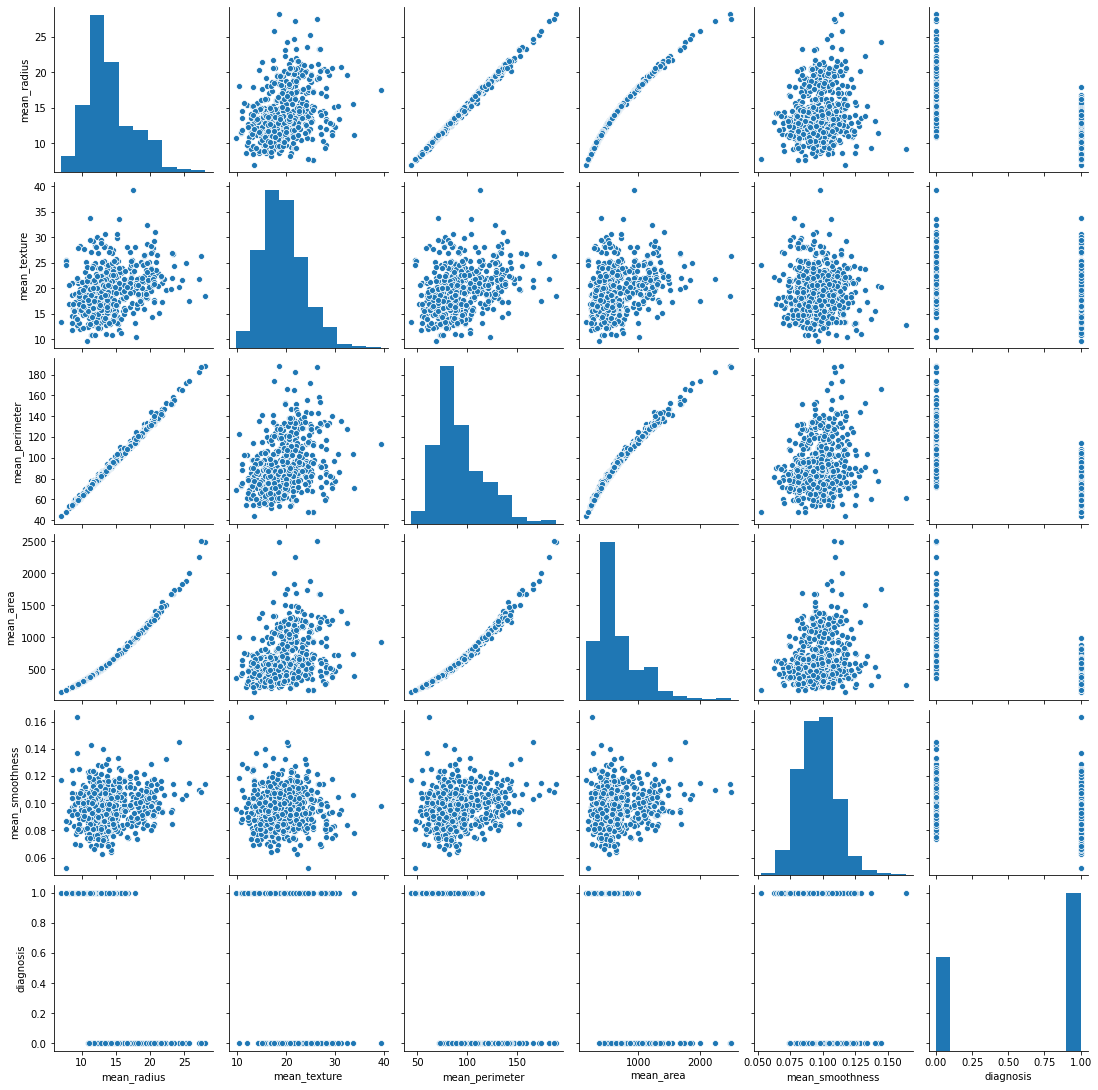

In [10]:
#Further feature analysis
sns.pairplot(df1)

This confirms our views that most of the data are normally distributed, except mean_area which is right skewed As we have already planned to drop mean_area and mean_perimeter - this need not be transformed

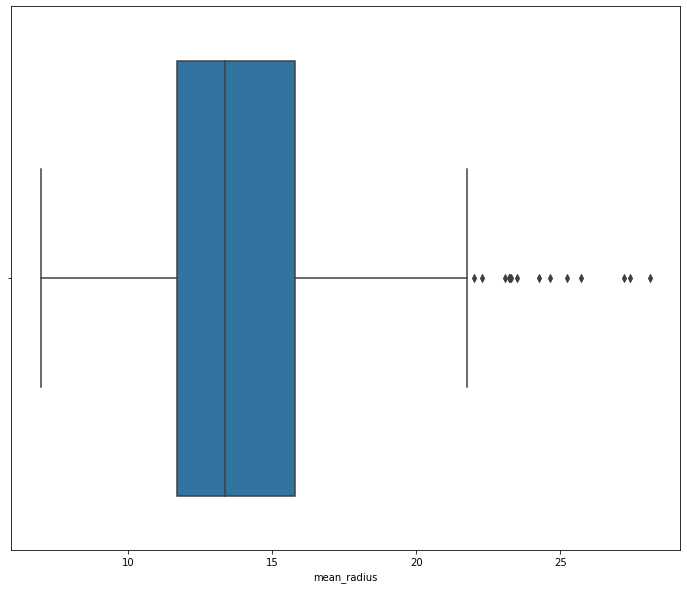

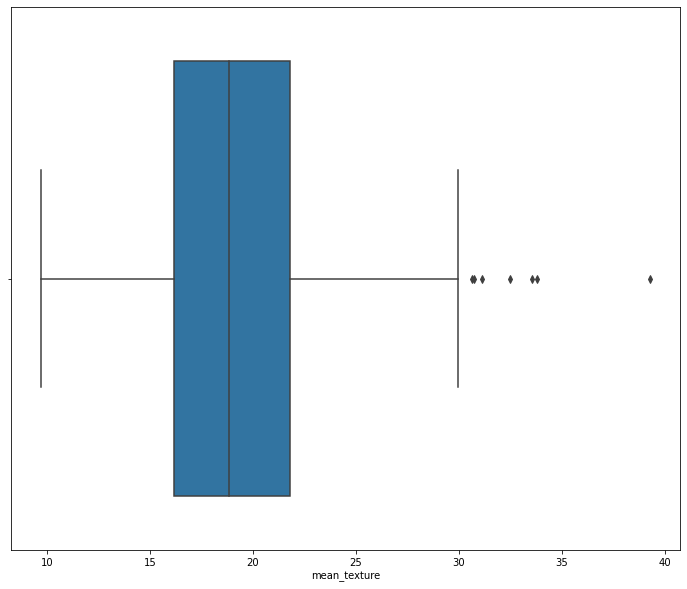

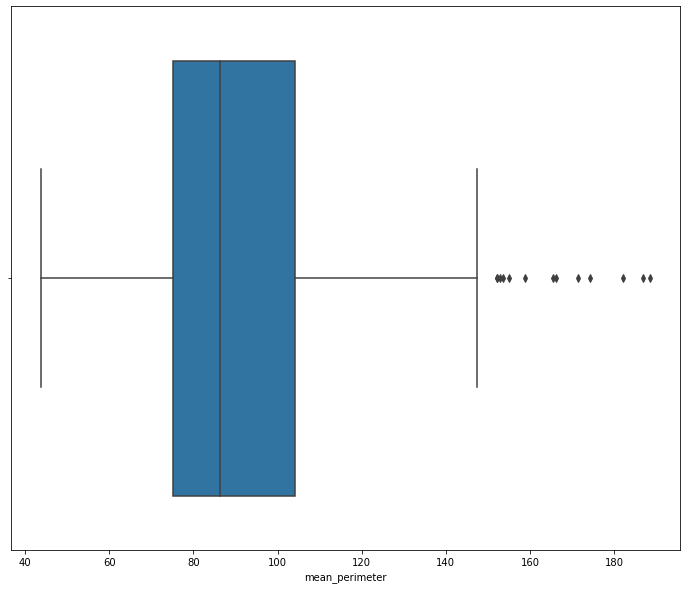

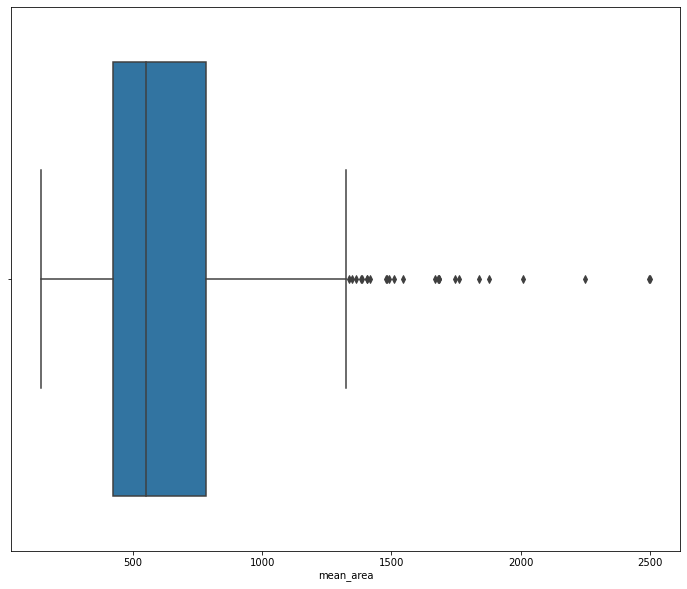

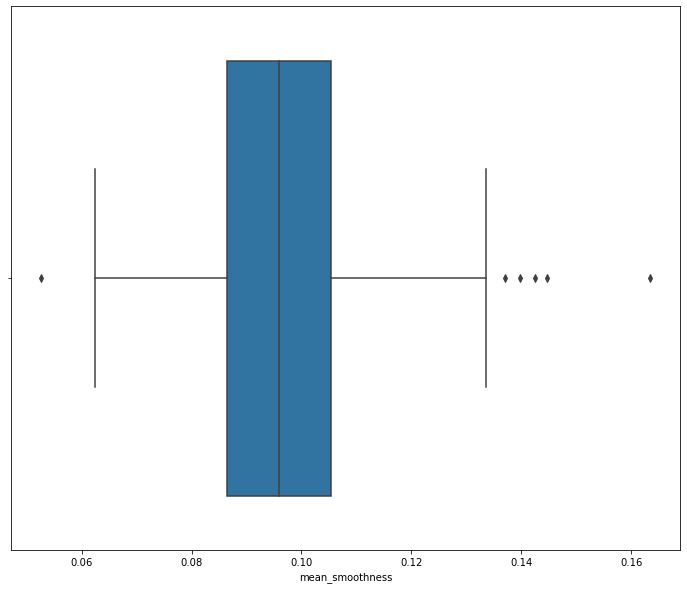

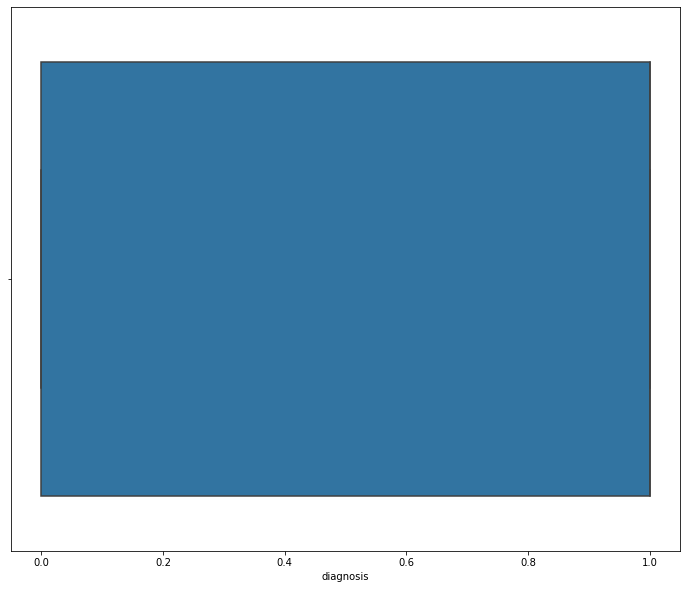

In [11]:
#We are checking the outliers in the data
for i in df1.columns:
    plt.figure(figsize=(12,10))
    sns.boxplot(df1[i])

Observation : There are limted outliers, so not treating them now

In [12]:
#We shall re-order the columns and then drop the highly correlated columns
df1 = df1[['mean_radius','mean_texture','mean_smoothness','mean_perimeter','mean_area','diagnosis']]

In [13]:
from sklearn.preprocessing import StandardScaler
std_scale= StandardScaler()
X = std_scale.fit_transform(df1.drop(['mean_area','mean_perimeter','diagnosis'], axis=1))
y = df1['diagnosis']

In [14]:
X_data = pd.DataFrame(X, columns=df1.columns[:-3])

In [15]:
X_data.head()

,mean_radius,mean_texture,mean_smoothness
0,1.097064,-2.073335,1.568466
1,1.829821,-0.353632,-0.826962
2,1.579888,0.456187,0.942210
3,-0.768909,0.253732,3.283553
4,1.750297,-1.151816,0.280372


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_data, y, test_size=0.3)

**KNN (K Nearest Neighbor)** is normally used as Classifier algorithm.

This algorithm is used in the case the Target variable is mostly balanced.

Here K denotes the neighbor count and based on the number of Neigbors defined for the new entrant, the most popular on voting (between the categories and their distance) are chosen as the category for the entrant.

In KNN there are various parameters defined while instantiating the algorithm. Important of of them is the metric, which is used to calculate the distance between the items

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[62  9]
 [ 7 93]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.89        71
           1       0.91      0.93      0.92       100

    accuracy                           0.91       171
   macro avg       0.91      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171



In [19]:
# Let us find the right K value
error_plt=[]
for i in range(1,40):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    error_plt.append(np.mean(y_pred !=y_test))

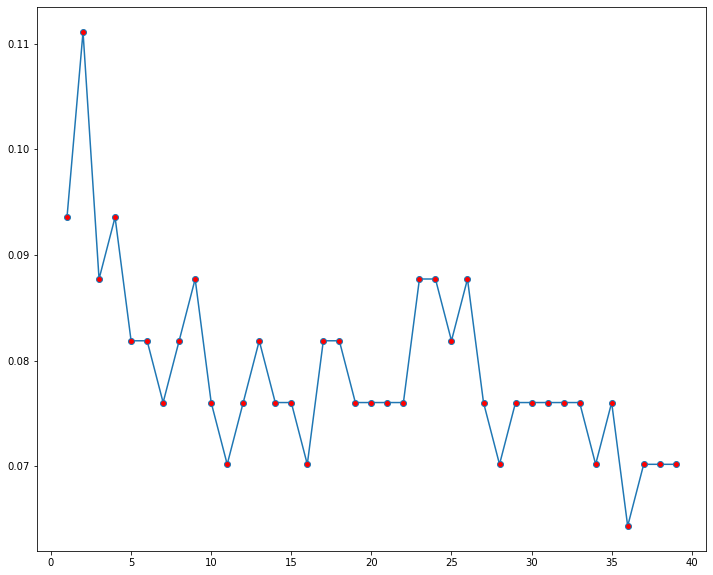

In [20]:
plt.figure(figsize=(12,10))
plt.plot(range(1,40), error_plt,marker='o', markerfacecolor='red')

In [21]:
knn1= KNeighborsClassifier(n_neighbors=25)
knn1.fit(X_train, y_train)
y1_pred=knn1.predict(X_test)

In [22]:
print(confusion_matrix(y_test, y1_pred))
print(classification_report(y_test,y1_pred))

[[61 10]
 [ 4 96]]
              precision    recall  f1-score   support

           0       0.94      0.86      0.90        71
           1       0.91      0.96      0.93       100

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171



We fairly had a good outcome with KNN as we had an appropriate K value chosen.
Accuracy of 0.96

**Naive Bayes** is the first and easy approach on any Clasification Analysis. This works on the assumption of independence of predictors Though this is the easy method for classification, the result is purely based on the Probability of the Class (ie., category)

In [23]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y2_pred=gnb.predict(X_test)

In [24]:
print('Accuracy report for GNB ',accuracy_score(y_test, y2_pred) )
print('Confusion Matrix  ', confusion_matrix(y_test, y2_pred))
print('Classification Report  ',classification_report(y_test,y2_pred))

Accuracy report for GNB  0.9005847953216374
Confusion Matrix   [[58 13]
 [ 4 96]]
Classification Report                 precision    recall  f1-score   support

           0       0.94      0.82      0.87        71
           1       0.88      0.96      0.92       100

    accuracy                           0.90       171
   macro avg       0.91      0.89      0.90       171
weighted avg       0.90      0.90      0.90       171



Naive Bayes Accuracy is 0.9415

In [25]:
#Random Forest Classifier - using this approach to see for any better outcome than the KNN
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
def random_forest(train, test, y_train, _test, n_estimators = 10, max_depth = 20, min_samples_split = 2, random_state=42):
    rfc = RandomForestClassifier(n_estimators=n_estimators,max_depth=20, min_samples_split=2,random_state=42)
    rfc.fit(X_train, y_train)
    y3_pred=rfc.predict(X_test)
    print('Estimator count   ',n_estimators)
    print('Minimum Samples Split   ',min_samples_split)
    print(accuracy_score(y_test, y3_pred))
    print(confusion_matrix(y_test, y3_pred))
    print(' ')
    print(' ')
    print('*****************')

In [26]:
for i in range(2,100,5):
    for j in range(2,10,2):
        random_forest(X_train, X_test, y_train, y_test, n_estimators=i, max_depth=20, min_samples_split=j, random_state=42)

Estimator count    2
Minimum Samples Split    2
0.847953216374269
[[61 10]
 [16 84]]
 
 
*****************
Estimator count    2
Minimum Samples Split    4
0.847953216374269
[[61 10]
 [16 84]]
 
 
*****************
Estimator count    2
Minimum Samples Split    6
0.847953216374269
[[61 10]
 [16 84]]
 
 
*****************
Estimator count    2
Minimum Samples Split    8
0.847953216374269
[[61 10]
 [16 84]]
 
 
*****************
Estimator count    7
Minimum Samples Split    2
0.8947368421052632
[[59 12]
 [ 6 94]]
 
 
*****************
Estimator count    7
Minimum Samples Split    4
0.8947368421052632
[[59 12]
 [ 6 94]]
 
 
*****************
Estimator count    7
Minimum Samples Split    6
0.8947368421052632
[[59 12]
 [ 6 94]]
 
 
*****************
Estimator count    7
Minimum Samples Split    8
0.8947368421052632
[[59 12]
 [ 6 94]]
 
 
*****************
Estimator count    12
Minimum Samples Split    2
0.9064327485380117
[[60 11]
 [ 5 95]]
 
 
*****************
Estimator count    12
Minimum S

In [27]:
#We chose estimator 92, as this had best Accuracy compared with rest
rfc_new = RandomForestClassifier(n_estimators=92,max_depth=20, min_samples_split=2,random_state=42 )
rfc_new.fit(X_train, y_train)
y6_pred=rfc_new.predict(X_test)
print(accuracy_score(y_test, y6_pred))
print(confusion_matrix(y_test, y6_pred))

0.9122807017543859
[[61 10]
 [ 5 95]]


Now that still we have KNN as the best outcome approach. Let us use this dataset to try other classifiers to try and practice

In [28]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(X_train, y_train)
y4_pred = logReg.predict(X_test)
print(accuracy_score(y_test, y4_pred))
print(confusion_matrix(y_test, y4_pred))

0.9239766081871345
[[62  9]
 [ 4 96]]


In [29]:
# I am going to try the Voting Classifier, with the previous classifier algorithms - Logistic Regression
#Random Forest Classifier, KNN, Naive Bayes. Let us try Hard voting first
from sklearn.ensemble import VotingClassifier
vot_class = VotingClassifier(estimators=[('logReg',logReg),('Random',rfc_new),('KNN', knn1),('Naive', gnb)], voting='hard')
vot_class.fit(X_train, y_train)
y5_pred = vot_class.predict(X_test)
print(accuracy_score(y_test, y5_pred))
print(confusion_matrix(y_test, y5_pred))

0.9239766081871345
[[62  9]
 [ 4 96]]


In [30]:
# Voting Classifier using Soft voting
vot_class2 = VotingClassifier(estimators=[('logReg',logReg),('Random',rfc_new),('KNN', knn1),('Naive', gnb)], voting='soft')
vot_class2.fit(X_train, y_train)
y7_pred = vot_class2.predict(X_test)
print(accuracy_score(y_test, y7_pred))
print(confusion_matrix(y_test, y7_pred))

0.9122807017543859
[[60 11]
 [ 4 96]]


In [31]:
#Trying Stacking Classifier
from sklearn.ensemble import StackingClassifier
stck_class = StackingClassifier(estimators=[('logReg',logReg),('Random',rfc_new),('KNN', knn1),('Naive', gnb)], cv=5, final_estimator=LogisticRegression())
stck_class.fit(X_train, y_train)
y8_pred = stck_class.predict(X_test)
print(accuracy_score(y_test, y8_pred))
print(confusion_matrix(y_test, y8_pred))

0.9122807017543859
[[60 11]
 [ 4 96]]


Let us check the Accuracy Report from each Algorithms
1. KNN, with K value as 25 - 0.96
2. Naive Bayes - 0.94
3. Random Forest Classifier (n_estimators=92) - 0.9532
4. Logistic Regression - 0.976
5. Voting Classifier 'Hard' Voting - 0.970
6. Voting Classifier 'Soft' Voting - 0.959
7. Stacking Classifier - 0.970

**Final Conclusion - Logistic Regression** had high accuracy with 0.976, also its Confusion Report had Less Type 1 Error (1) and Less Type 2 Error (3) compared with other models.